In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_ds = pd.read_csv('sentiment_train', delimiter = '\t')

In [ ]:
train_ds.head(3)

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.


In [ ]:
train_ds[train_ds.sentiment == 0][:5]

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty ..."
3945,0,"The Da Vinci Code comes out tomorrow, which su..."
3946,0,i thought the da vinci code movie was really b...
3947,0,"God, Yahoo Games has this truly-awful looking ..."


In [ ]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


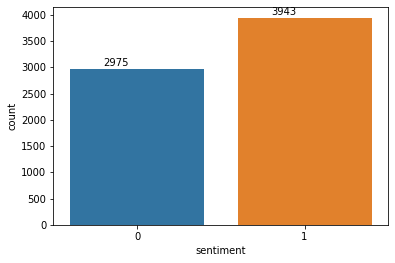

In [ ]:
plot = sns.countplot(x = 'sentiment', data = train_ds)

for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x() + 0.2, p.get_height() + 50))

## Text Pre-processing

### Bag of Words (BoW)
1. Create a dict of all words used in corpus
2. Convert each document to vector

#### Importance of Words in BoW model
1. Count Vector Model
2. Term frequency vector model
3. Term frequency - Inverse document frequency model (TF-IDF) model

### Count Vector Model
1. Document 1 (positive sentiment) : I really really like IPL
2. Document 2 (negative sentiment) : I never like IPL

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
count_vectorizer = CountVectorizer()
feature_vector = count_vectorizer.fit(train_ds.text)
features = feature_vector.get_feature_names()

In [ ]:
print("Total number of features - ", len(features))

Total number of features -  2132


In [ ]:
import random
random.sample(features, 10)

['dumbledor',
 'creatures',
 'immortal',
 'becoming',
 'unauthorized',
 'ask',
 'bolsters',
 'gladly',
 '50',
 'atrocious']

In [ ]:
train_ds_features = count_vectorizer.transform(train_ds.text)
train_ds_features.shape

(6918, 2132)

In [ ]:
train_ds_features.getnnz()

65398

#### Density of matrix

In [ ]:
train_ds_features.getnnz() * 100 / (train_ds_features.shape[0] * train_ds_features.shape[1])

0.4434010415225908

#### Displaying the document vectors

In [ ]:
train_ds_df = pd.DataFrame(train_ds_features.todense(), columns = features)

In [ ]:
train_ds_df.head(5)

,00,007,10,10pm,12,16,17,1984,1st,200,2007,286,2nd,30,31st,33,3333,385,50,517,648,6th,700,7th,8230,9am,aaron,able,abortion,about,abrams,absolute,absolutely,absurd,academy,acceptable,accompaniment,according,account,achieved,...,working,world,worlds,worse,worst,worth,worthless,wotshisface,would,wow,wranglers,write,writer,writers,writes,writing,written,wrong,wrote,wussies,x3,xd,ya,yahoo,yea,yeah,year,yes,yesterday,yet,yip,you,young,younger,your,yuck,yuh,zach,zen,µª
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_ds_df.iloc[0:6, 150:157]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward
0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0


In [ ]:
train_ds_df[['the', 'da', 'vinci', 'code', 'book', 'is', 'just', 'awesome']][0:1]

,the,da,vinci,code,book,is,just,awesome
0,1,1,1,1,1,1,1,1


In [ ]:
frequency_count = np.sum(train_ds_features.toarray(), axis = 0)
frequency_count_df = pd.DataFrame(dict(features = features, counts = frequency_count))

Text(0, 0.5, 'Density')

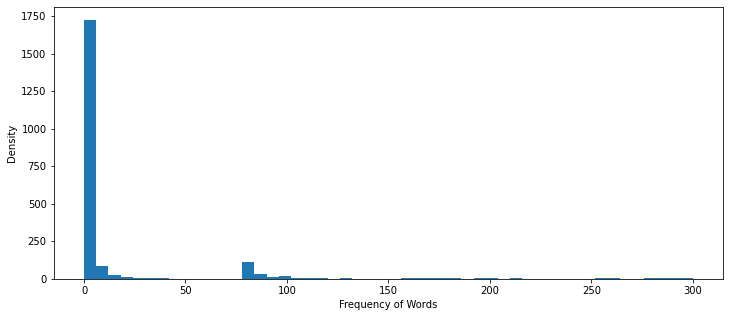

In [ ]:
plt.figure(figsize = (12, 5))
plt.hist(frequency_count_df.counts, bins = 50, range = (0, 300))
plt.xlabel("Frequency of Words")
plt.ylabel("Density")

In [ ]:
len(frequency_count_df[frequency_count_df.counts == 1])

1228

In [ ]:
count_vectorizer = CountVectorizer(max_features = 1000)
feature_vector = count_vectorizer.fit(train_ds.text)
features = feature_vector.get_feature_names()
train_ds_features = count_vectorizer.transform(train_ds.text)

frequency_count = np.sum(train_ds_features.toarray(), axis = 0)
frequency_count_df = pd.DataFrame(dict(features = features, counts = frequency_count))

In [ ]:
frequency_count_df.sort_values('counts', ascending = False)[0:20]

,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


#### Removing stop words

In [ ]:
from sklearn.feature_extraction import text

In [ ]:
stop_words = text.ENGLISH_STOP_WORDS
print("Stop Words - ", list(stop_words)[:11])

Stop Words -  ['already', 'his', 'bottom', 'will', 'keep', 'anyone', 'alone', 'now', 'of', 'everything', 'our']


#### Adding custom stop words to standard stop words

In [ ]:
stop_words = text.ENGLISH_STOP_WORDS.union(['harry', 'potter', 'da', 'vinci', 'movie'])

In [ ]:
count_vectorizer = CountVectorizer(stop_words = stop_words, max_features = 1000)
feature_vector = count_vectorizer.fit(train_ds.text)
features = feature_vector.get_feature_names()
train_ds_features = count_vectorizer.transform(train_ds.text)

frequency_count = np.sum(train_ds_features.toarray(), axis = 0)
frequency_count_df = pd.DataFrame(dict(features = features, counts = frequency_count))

In [ ]:
frequency_count_df.sort_values('counts', ascending = False)[0:20]

,features,counts
104,code,2002
73,brokeback,2000
442,mountain,2000
409,love,1624
39,awesome,1127
437,mission,1094
342,impossible,1093
391,like,974
747,sucks,602
745,sucked,600


#### Stemming
PorterStemmer and LancasterStemmer, EnglishStemmer

#### Lematization
WordNetLemmitizer

In [ ]:
from nltk.stem.snowball import PorterStemmer

stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
    non_stop_words = [word for word in stemmed_words if not stop_words]
    return non_stop_words

In [ ]:
count_vectorizer = CountVectorizer(analyzer = stemmed_words(train_ds.text), max_features = 1000)
feature_vector = count_vectorizer.fit(train_ds.text)
features = feature_vector.get_feature_names()
train_ds_features = count_vectorizer.transform(train_ds.text)

frequency_count = np.sum(train_ds_features.toarray(), axis = 0)
frequency_count_df = pd.DataFrame(dict(features = features, counts = frequency_count))

AttributeError: ignored